In [ ]:
## Examples are from the book: Python for Geospatial Analysis

In [3]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
G = ox.graph_from_place("Nanjing, Jiangsu, China", network_type="drive")

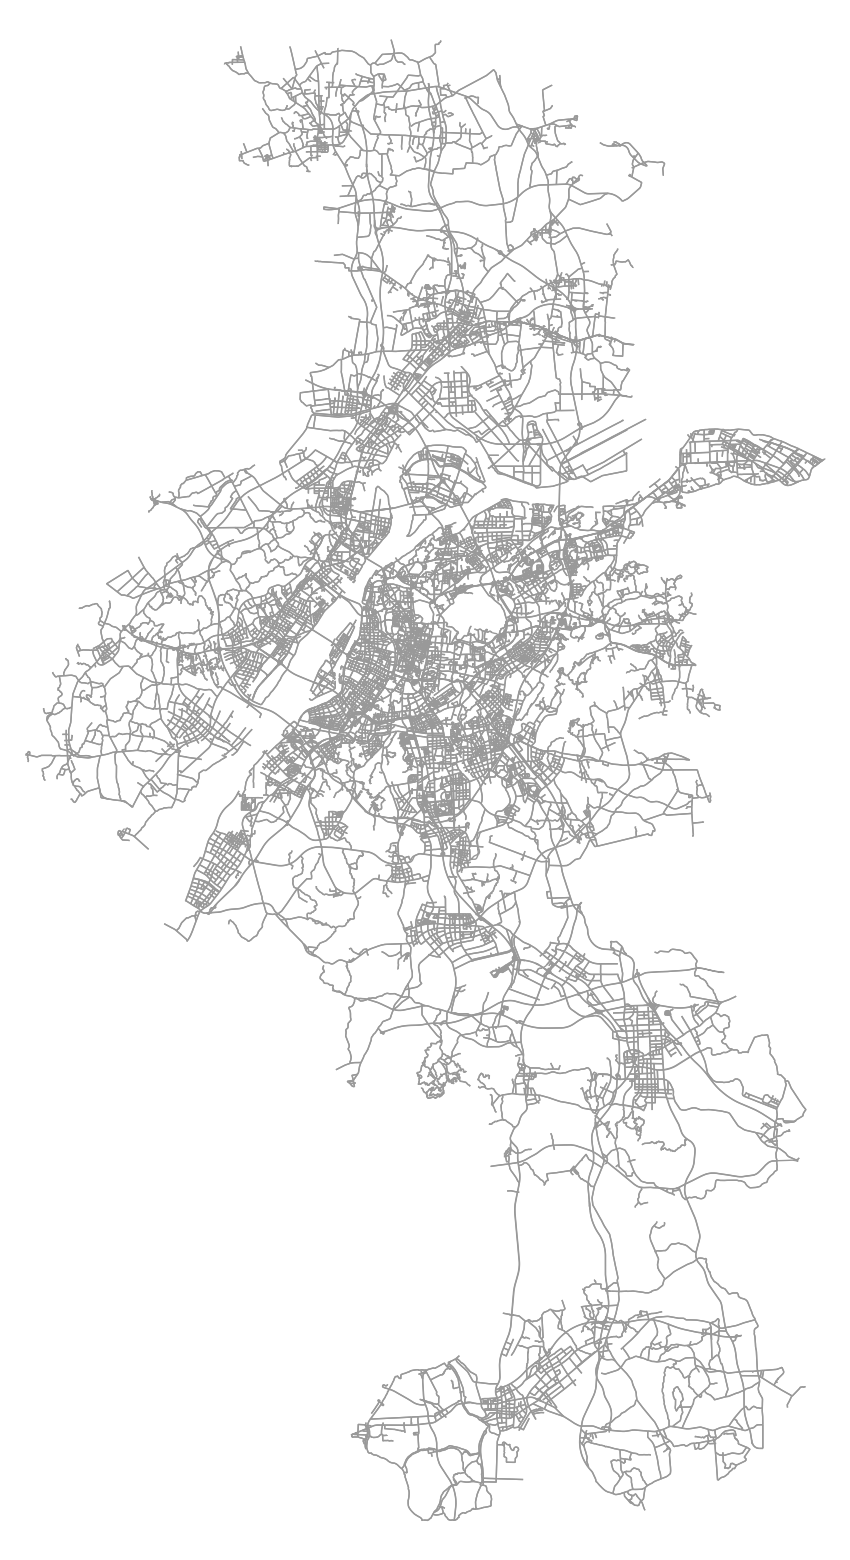

In [5]:
fig, ax = ox.plot_graph(G,figsize=(20,20),bgcolor='#FFFFFF',
    node_color='black', node_size=0)

In [6]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

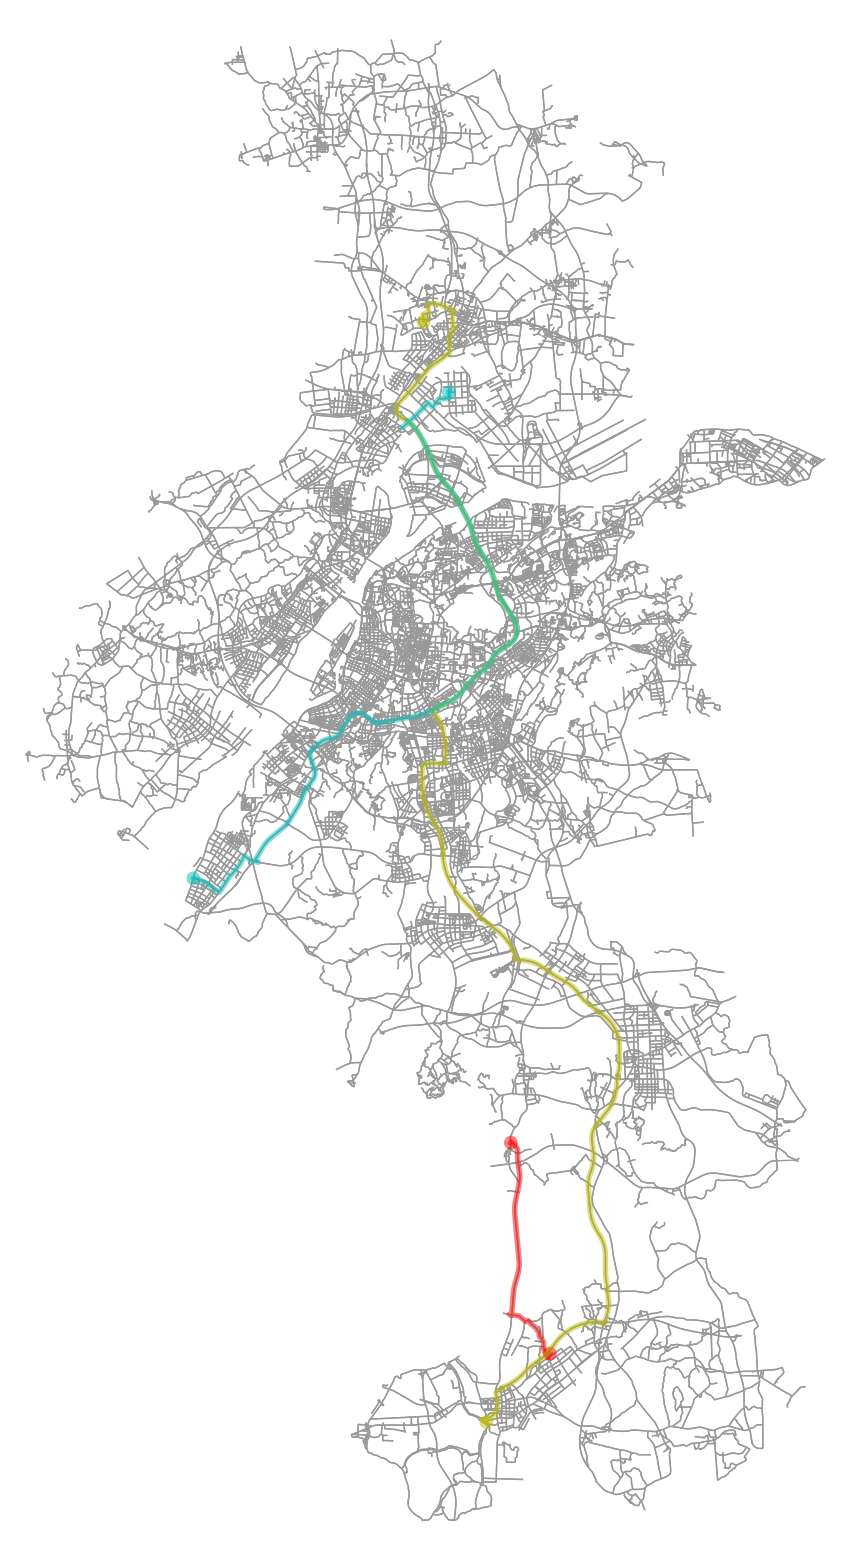

In [10]:
w = 'travel_time'
G_list = list(G)
orig, dest = G_list[10], G_list[256]
route1 = nx.shortest_path(G, orig, dest, weight=w)
orig, dest = G_list[0], G_list[-1]
route2 = nx.shortest_path(G, orig, dest, weight=w)
orig, dest = G_list[-10240], G_list[10240]
route3 = nx.shortest_path(G, orig, dest, weight=w)

routes = [route1, route2, route3]
rc = ['r', 'y', 'c']
fig, ax = ox.plot_graph_routes(G, routes, route_colors=rc, route_linewidth=6, 
figsize=(20, 20),node_size=0,bgcolor='#FFFFFF')

In [11]:
# Circuity is the ratio of network distances to straight-line distances. 
ox.basic_stats(G)["circuity_avg"]

1.0582960588094628

# Betweenness centrality

*Betweenness centrality* measures how central a location or node is within a larger network or neighborhood.


In [12]:
# calculate betweenness with a digraph of G (ie, no parallel edges)

bc = nx.betweenness_centrality(ox.get_digraph(G), weight="length")
max_node, max_bc = max(bc.items(), key=lambda x: x[1])
max_node, max_bc

KeyboardInterrupt: 

In [ ]:
# visualize this node with best betweenness

nc = ["r" if node == max_node else "grey" for node in G.nodes]
ns = [100 if node == max_node else 15 for node in G.nodes]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=5)
plt.show()